### Content-based filtering of metadata

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
features = pd.read_pickle('features.pkl')

In [3]:
features.shape

(30092, 120)

In [4]:
features.head()

,track_id,name,artist,year,duration_ms,danceability,energy,key,loudness,mode,...,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop,world
0,0,Mr. Brightside,The Killers,0.000849,-0.266861,-0.774918,0.921271,-1.208266,0.864513,0.763151,...,0,0,0,0,0,0,0,0,0,0
1,1,Wonderwall,Oasis,0.226113,0.071953,-0.472605,0.818013,-0.928036,0.861657,0.763151,...,0,0,0,0,0,0,0,0,0,0
2,2,Take Me Out,Franz Ferdinand,0.000849,-0.128909,-1.200397,-0.087478,1.033573,-0.122133,0.763151,...,0,0,0,0,0,0,0,0,0,0
3,3,Karma Police,Radiohead,-0.900206,0.122692,-0.746926,-0.718940,0.473114,-0.183208,0.763151,...,0,0,0,0,0,0,0,0,0,0
4,4,Clocks,Coldplay,-0.224414,0.530362,0.467927,0.250095,-0.087346,0.237286,-1.310357,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# drop track_id, name, artist
features.drop(['track_id', 'name', 'artist'], axis=1, inplace=True)

### Principal Component Analysis

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=20)

In [8]:
X_pca = pca.fit_transform(features)

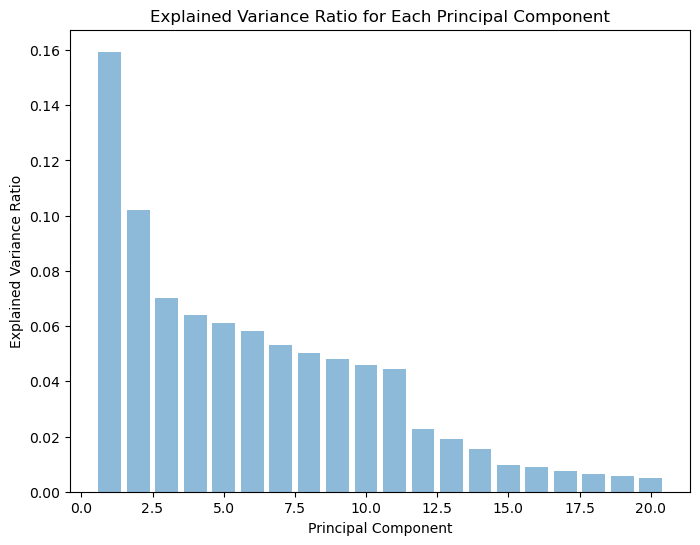

In [9]:
import matplotlib.pyplot as plt
# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a bar plot to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Cosine Similarity Matrix

In [6]:
features_array = np.array(features)
# convert to float16
#features_array = features_array.astype('float16')

In [10]:
similarity_matrix = cosine_similarity(features_array)

In [12]:
# convert to float16 to save space
similarity_matrix = np.array(similarity_matrix, dtype='float16')

In [13]:
import pickle

# write to file
pickle.dump(similarity_matrix, open('cosine_matrix.pkl', 'wb'))
